In [ ]:
!pip install qsurface
!pip install matplotlib==3.5.0
!pip install pandas==1.3.5

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 2.6 MB/s eta 0:00:00
  Created wheel for pptree: filename=pptree-3.1-py3-none-any.whl size=4609 sha256=e4e5c468393fb0973018325a7c8b8895580b9e895635748dab24a538fa722281
  Stored in directory: /root/.cache/pip/wheels/9f/b6/0e/6f26eb9e6eb53ff2107a7888d72b5a6a597593956113037828
Successfully built pptree
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.11.1 requires matplotlib>=3.7.1, but you have matplotlib 3.5.0 which is incompatible.
p

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.18.0 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
bigframes 1.11.1 requires matplotlib>=3.7.1, but you have matplotlib 3.5.0 which is incompatible.
bigframes 1.11.1 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.5 which is incompatible.
geopandas 0.14.4 requires pandas>=1.4.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires matplotlib>=3.

In [ ]:
import time
import matplotlib.pyplot as plt
from qsurface.main import run, initialize
from qsurface.main import BenchmarkDecoder

### **Toric Code With qsurface**

### **Decoder time measuring function**

In [ ]:
def measure_decoder_time(L, p_phaseflip):
  code, decoder = initialize((L,L), "toric", "unionfind", enabled_errors=["pauli","erasure"])
  code.random_errors(p_phaseflip=p_phaseflip)

  start_time = time.time()
  decoder.decode()
  decoder_time = time.time() - start_time

  return decoder_time

In [ ]:
L = range(2, 21, 2)
error_rates = [0.01, 0.02, 0.03, 0.04, 0.05]
results = {p: [] for p in error_rates}

### **Measuring the decoder time**

In [ ]:
for p in error_rates:
  for size in L:
    decoder_time = measure_decoder_time(size, p)
    results[p].append(decoder_time)
    print(f"Error_rate: {p}, Qubit Size: {size}x{size}, Decoded time: {decoder_time:.4f} seconds")

Error_rate: 0.01, Qubit Size: 2x2, Decoded time: 0.0002 seconds
Error_rate: 0.01, Qubit Size: 4x4, Decoded time: 0.0010 seconds
Error_rate: 0.01, Qubit Size: 6x6, Decoded time: 0.0020 seconds
Error_rate: 0.01, Qubit Size: 8x8, Decoded time: 0.0048 seconds
Error_rate: 0.01, Qubit Size: 10x10, Decoded time: 0.0091 seconds
Error_rate: 0.01, Qubit Size: 12x12, Decoded time: 0.0167 seconds
Error_rate: 0.01, Qubit Size: 14x14, Decoded time: 0.0207 seconds
Error_rate: 0.01, Qubit Size: 16x16, Decoded time: 0.0314 seconds
Error_rate: 0.01, Qubit Size: 18x18, Decoded time: 0.0783 seconds
Error_rate: 0.01, Qubit Size: 20x20, Decoded time: 0.0620 seconds
Error_rate: 0.02, Qubit Size: 2x2, Decoded time: 0.0003 seconds
Error_rate: 0.02, Qubit Size: 4x4, Decoded time: 0.0021 seconds
Error_rate: 0.02, Qubit Size: 6x6, Decoded time: 0.0025 seconds
Error_rate: 0.02, Qubit Size: 8x8, Decoded time: 0.0132 seconds
Error_rate: 0.02, Qubit Size: 10x10, Decoded time: 0.0305 seconds
Error_rate: 0.02, Qubit Si

### Plotting

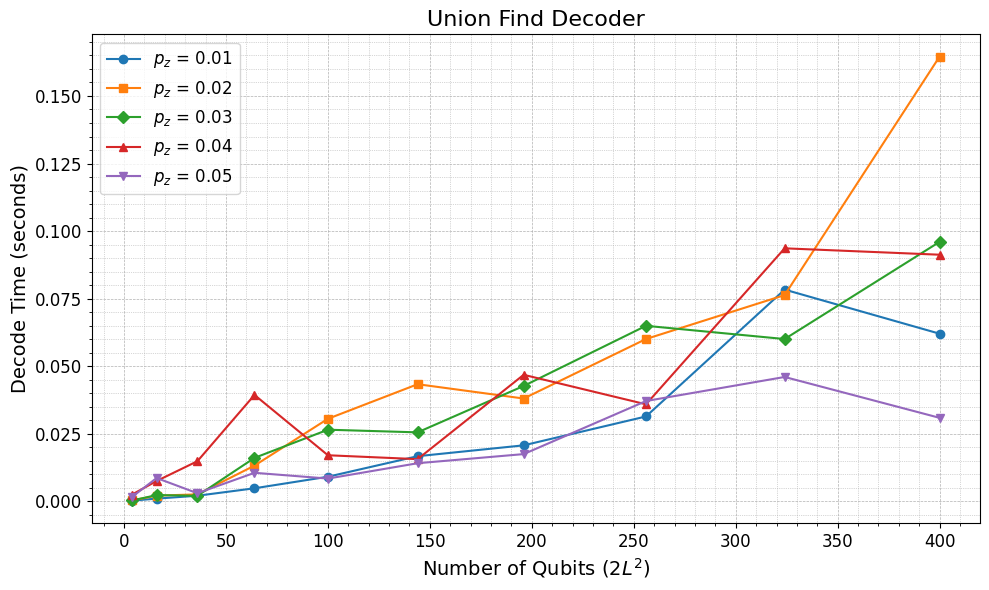

In [ ]:
markers = ['o', 's', 'D', '^', 'v']
plt.figure(figsize=(10, 6))

for p, marker in zip(error_rates, markers):
    plt.plot([size**2 for size in L], results[p], marker=marker, linestyle='-', label=f'$p_z$ = {p}')

plt.xlabel('Number of Qubits ($2L^2$)', fontsize=14)
plt.ylabel('Decode Time (seconds)', fontsize=14)
plt.title('Union Find Decoder', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

### **Toric code with graph**

Drawing 1/1: Initial


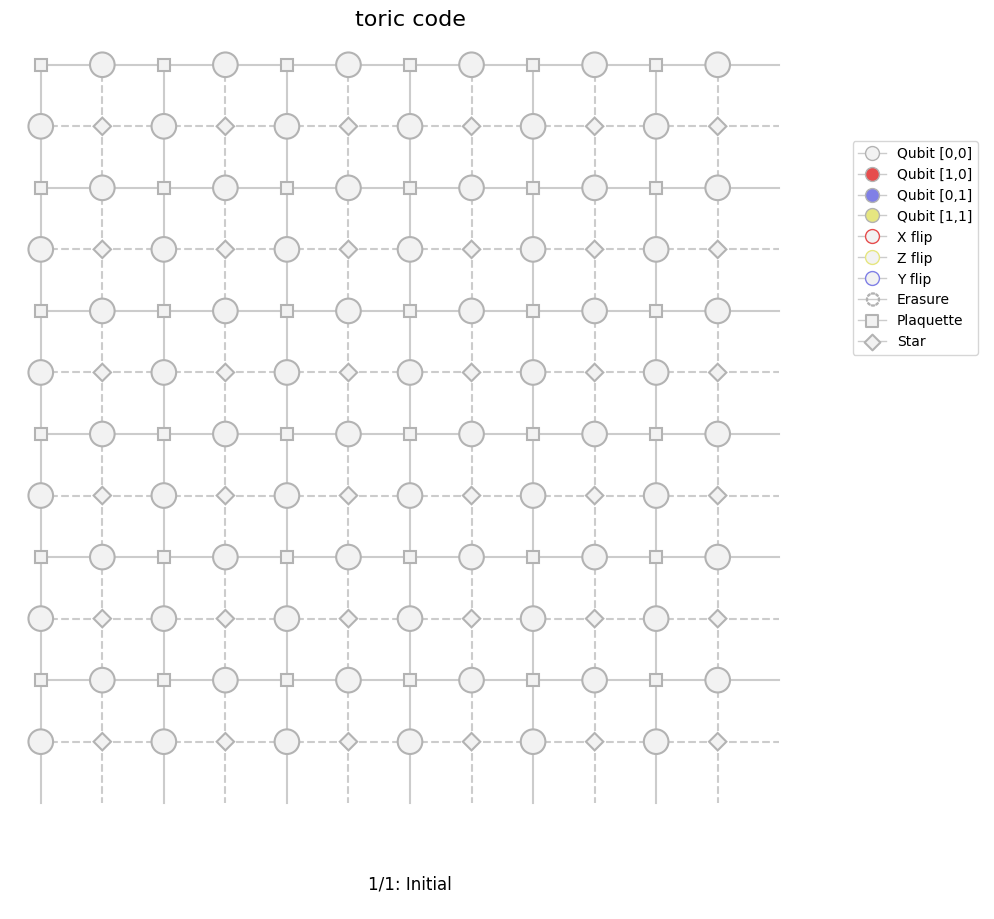

Drawing 2/2: Errors applied


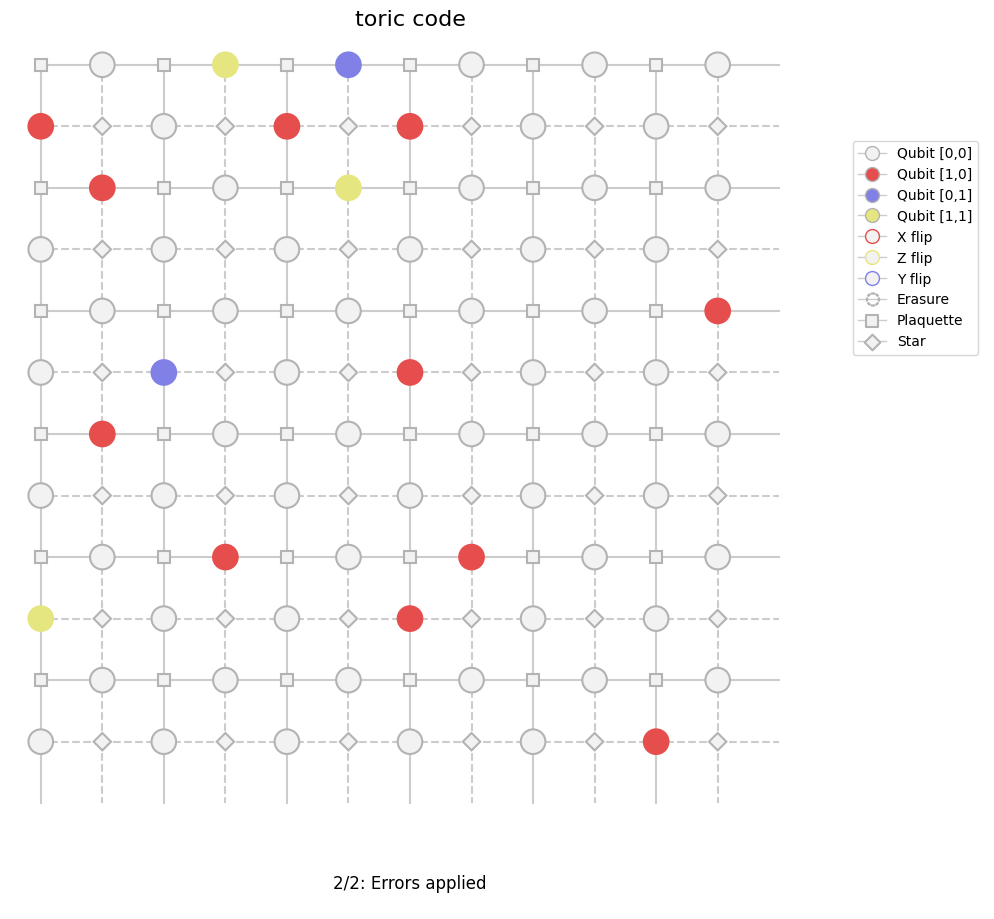

Drawing 3/3: Ancilla-qubits measured


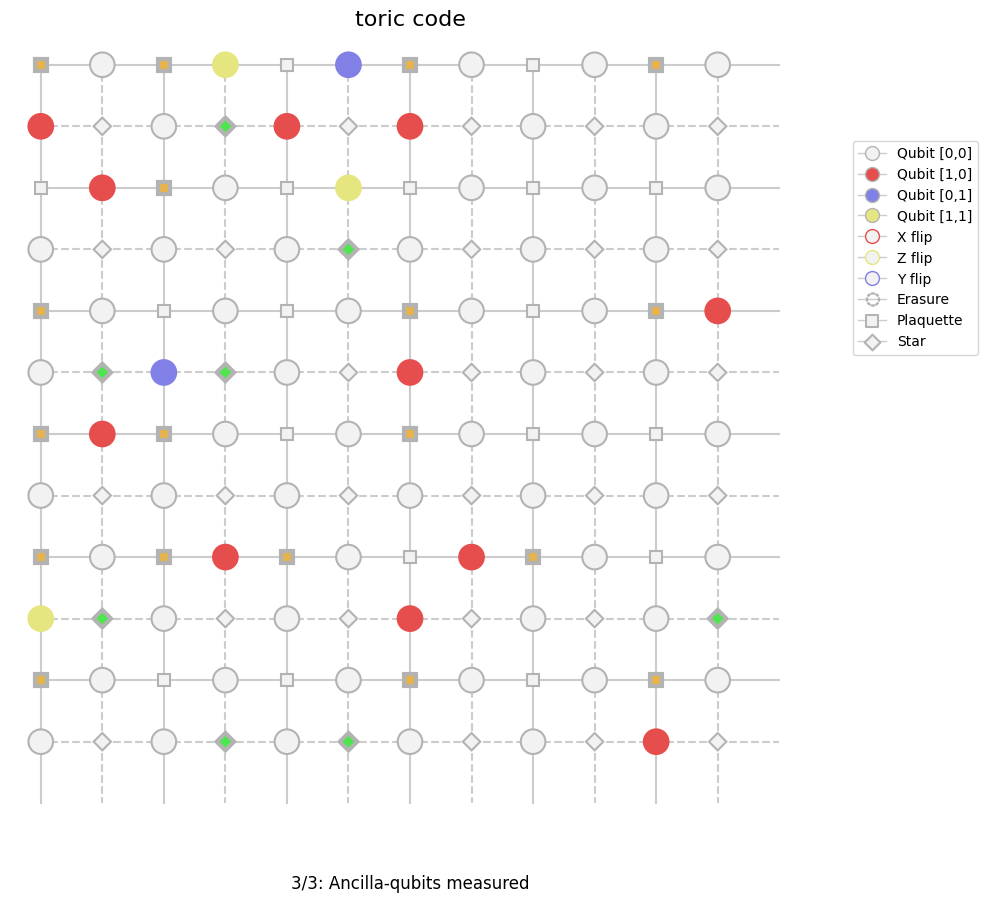

Drawing 4/4: Matchings found


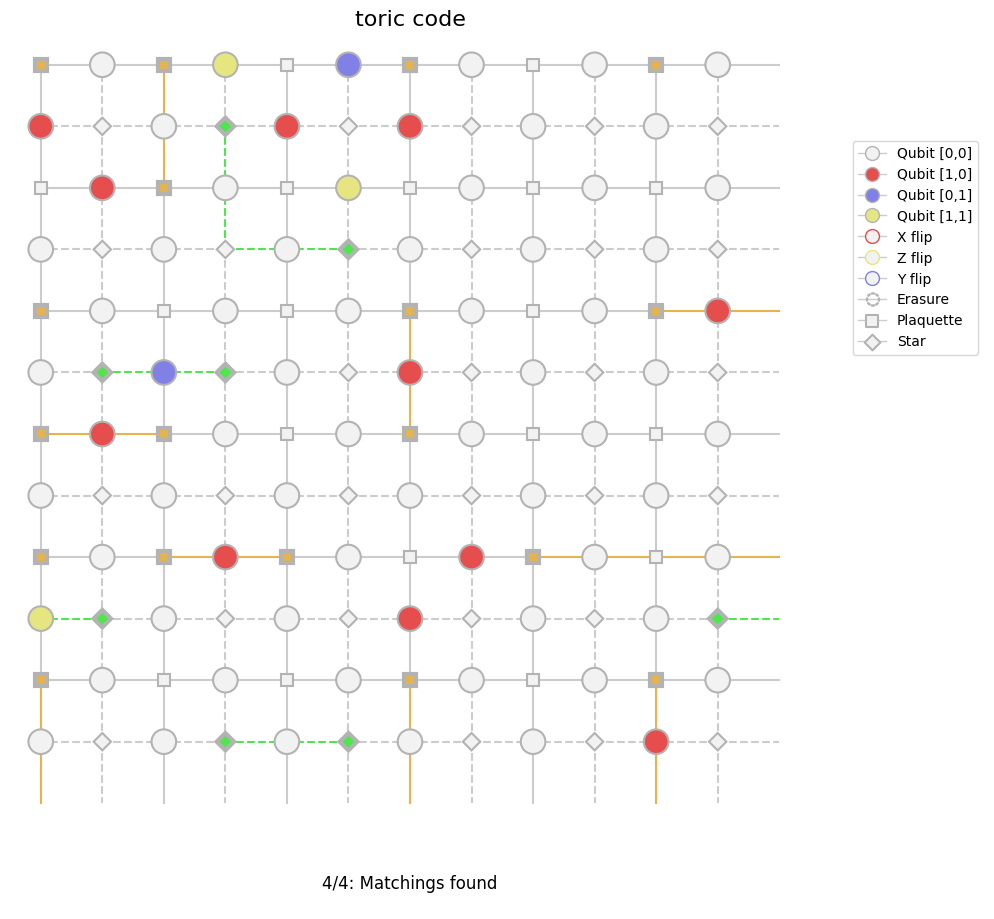

Drawing 5/5: Decoded


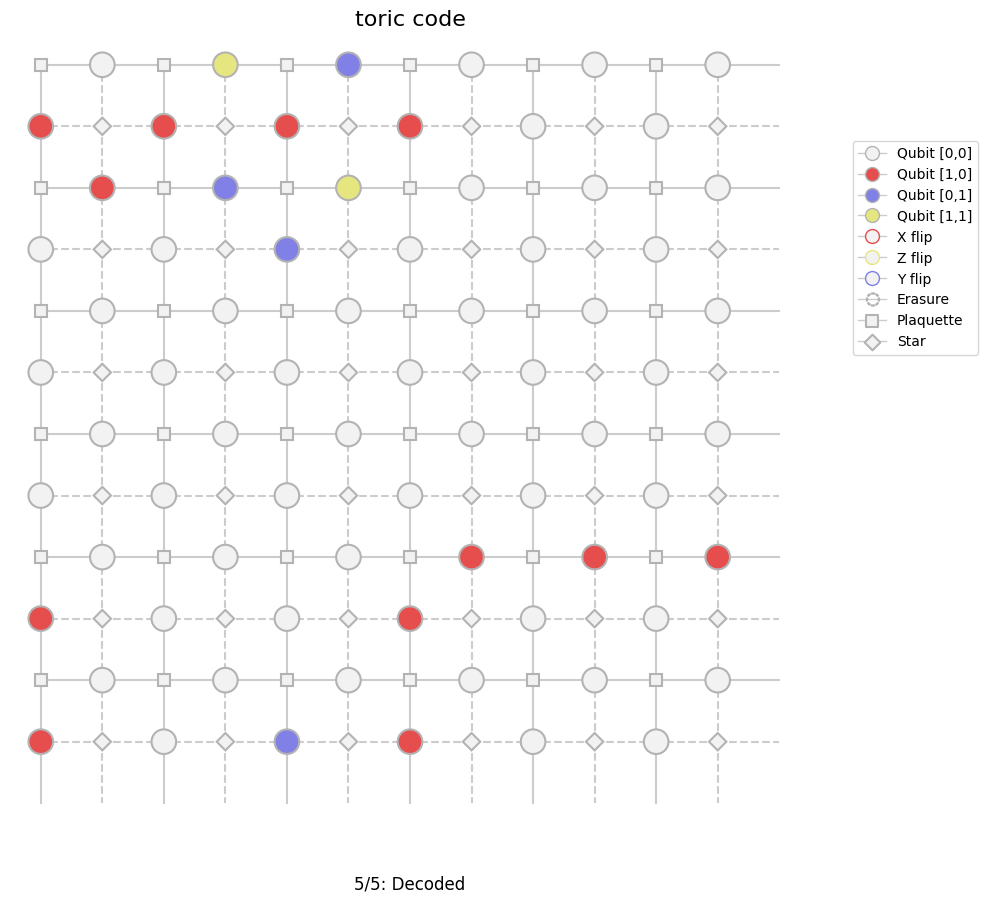

{'no_error': 0}

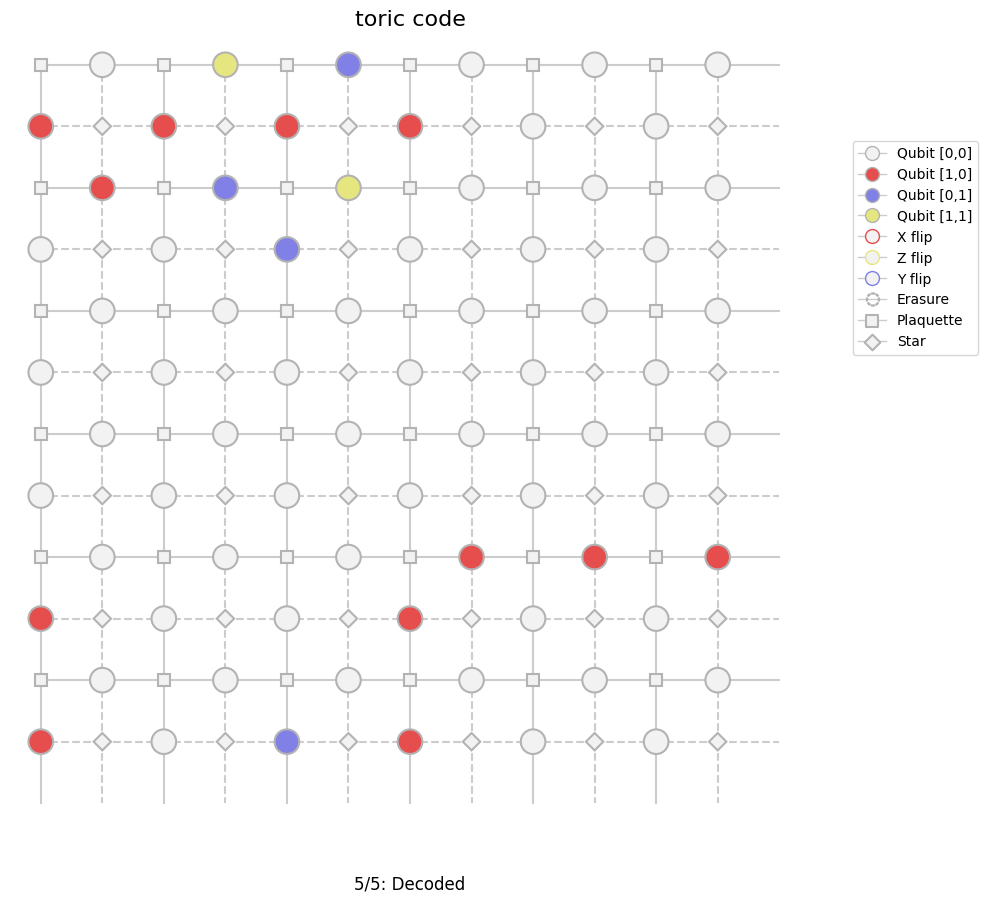

In [ ]:
from qsurface.main import initialize, run
code, decoder = initialize((6,6), "toric", "mwpm", enabled_errors=["pauli", "erasure"], plotting=True, initial_states=(0,0))
run(code, decoder, error_rates = {"p_phaseflip": 0.1, "p_bitflip": 0.2}, decode_initial=False)

### **Threshold Simulation**

In [ ]:
from qsurface.threshold import run_many

data = run_many(
    "toric",
    "unionfind",
    iterations = 1000,
    sizes = [8,12,16],
    enabled_errors = ["pauli"],
    error_rates = [{"p_phaseflip": p_z, "p_erasure": p_e} for p_z in [0.02, 0.04, 0.06, 0.08, 0.1] for p_e in [0.1, 0.2, 0.3, 0.4, 0.5]],
)
print(data)

Loading existing file toric_toric-pauli.csv.
Running (8) lattice with error rates {'p_phaseflip': 0.02, 'p_erasure': 0.1}.
Running iteration 1000/1000
{'datetime': '28/07/2024 06:05:46',
 'decoded': 1000,
 'iterations': 1000,
 'no_error': 1000,
 'p_erasure': 0.1,
 'p_phaseflip': 0.02,
 'seed': 533.538034172,
 'size': 8}
Running (8) lattice with error rates {'p_phaseflip': 0.02, 'p_erasure': 0.2}.
Running iteration 1000/1000
{'datetime': '28/07/2024 06:05:48',
 'decoded': 1000,
 'iterations': 1000,
 'no_error': 999,
 'p_erasure': 0.2,
 'p_phaseflip': 0.02,
 'seed': 536.32672267,
 'size': 8}
Running (8) lattice with error rates {'p_phaseflip': 0.02, 'p_erasure': 0.3}.
Running iteration 1000/1000
{'datetime': '28/07/2024 06:05:51',
 'decoded': 1000,
 'iterations': 1000,
 'no_error': 1000,
 'p_erasure': 0.3,
 'p_phaseflip': 0.02,
 'seed': 538.759082521,
 'size': 8}
Running (8) lattice with error rates {'p_phaseflip': 0.02, 'p_erasure': 0.4}.
Running iteration 1000/1000
{'datetime': '28/07/

# **Dataset generated by the simulation**


In [ ]:
import pandas as pd

csv = pd.read_csv('toric_toric-pauli.csv')


In [ ]:
csv.head()

,Unnamed: 0,no_error,datetime,size,p_phaseflip,p_erasure,decoded,iterations,seed
0,0,1000.0,28/07/2024 06:03:07,8.0,0.02,0.1,1000.0,1000.0,371.600510
1,1,1000.0,28/07/2024 06:03:11,8.0,0.02,0.2,1000.0,1000.0,377.655323
2,2,1000.0,28/07/2024 06:03:14,8.0,0.02,0.3,1000.0,1000.0,381.751893
3,3,1000.0,28/07/2024 06:03:18,8.0,0.02,0.4,1000.0,1000.0,384.741469
4,4,1000.0,28/07/2024 06:03:23,8.0,0.02,0.5,1000.0,1000.0,388.309915


In [ ]:
p_phaseflip = csv['p_phaseflip']
p_erasure = csv['p_erasure']
no_error = csv['no_error']
size = csv['size']

In [ ]:
error_correction = pd.read_csv('/content/error_correction .csv')
error_correction.to_excel('error_correction_excel.xlsx', index=False)

In [ ]:
import pandas as pd

csv_error_correction = pd.read_csv('error_correction_excel_1.csv')

print(csv_error_correction)

     p_phaseflip  p_erasure  no_error  size
0            NaN        NaN       NaN   NaN
1            NaN        NaN       NaN   NaN
2            NaN        NaN       NaN   NaN
3            NaN        NaN       NaN   NaN
4            NaN        NaN       NaN   NaN
..           ...        ...       ...   ...
244          0.1        0.1     735.0  16.0
245          0.1        0.2     732.0  16.0
246          0.1        0.3     737.0  16.0
247          0.1        0.4     727.0  16.0
248          0.1        0.5     741.0  16.0

[249 rows x 4 columns]


In [ ]:
filtered_data = csv_error_correction.dropna(subset=['p_phaseflip', 'p_erasure','no_error','size'])

In [ ]:
print(filtered_data)


     p_phaseflip  p_erasure  no_error  size
15           0.1       0.01     753.0   8.0
16           0.1       0.02     731.0   8.0
17           0.1       0.03     723.0   8.0
18           0.2       0.01     278.0   8.0
19           0.2       0.02     278.0   8.0
..           ...        ...       ...   ...
244          0.1       0.10     735.0  16.0
245          0.1       0.20     732.0  16.0
246          0.1       0.30     737.0  16.0
247          0.1       0.40     727.0  16.0
248          0.1       0.50     741.0  16.0

[234 rows x 4 columns]


In [ ]:
success_rate = (100*filtered_data['no_error'])/1000

In [ ]:
print(success_rate)

15     75.3
16     73.1
17     72.3
18     27.8
19     27.8
       ... 
244    73.5
245    73.2
246    73.7
247    72.7
248    74.1
Name: no_error, Length: 234, dtype: float64


In [ ]:
filtered_data['success_rate'] = success_rate

<ipython-input-53-1f509c625fc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['success_rate'] = success_rate


In [ ]:
filtered_data

,p_phaseflip,p_erasure,no_error,size,success_rate
15,0.1,0.01,753.0,8.0,75.3
16,0.1,0.02,731.0,8.0,73.1
17,0.1,0.03,723.0,8.0,72.3
18,0.2,0.01,278.0,8.0,27.8
19,0.2,0.02,278.0,8.0,27.8
...,...,...,...,...,...
244,0.1,0.10,735.0,16.0,73.5
245,0.1,0.20,732.0,16.0,73.2
246,0.1,0.30,737.0,16.0,73.7
247,0.1,0.40,727.0,16.0,72.7


In [ ]:
filtered_data.to_csv("Final_data.csv", index=False)

#**Threshold plot**

In [ ]:
import pandas as pd


file_path = 'Final_data.csv'
data = pd.read_csv(file_path)

print(data.head())

   p_phaseflip  p_erasure  no_error  size  success_rate
0          0.1       0.01     753.0   8.0          75.3
1          0.1       0.02     731.0   8.0          73.1
2          0.1       0.03     723.0   8.0          72.3
3          0.2       0.01     278.0   8.0          27.8
4          0.2       0.02     278.0   8.0          27.8


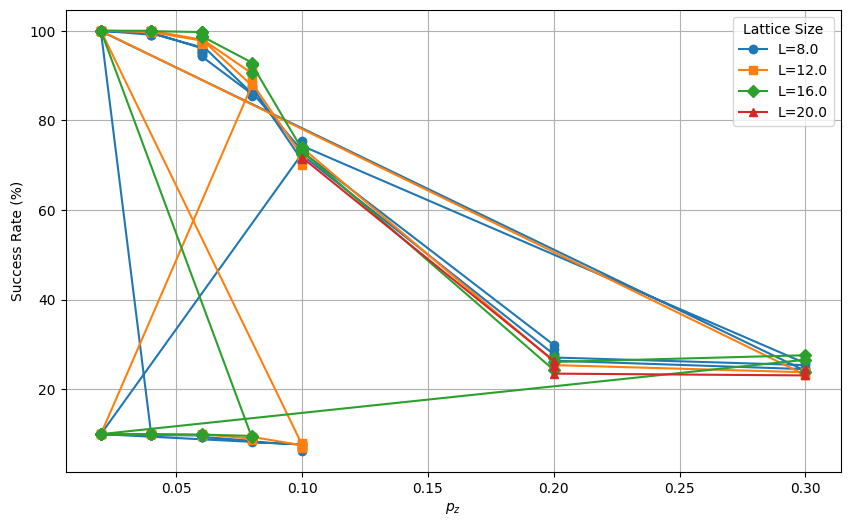

In [ ]:
import matplotlib.pyplot as plt


lattice_sizes = data['size'].unique()


data['p_phaseflip_percent'] = data['p_phaseflip']


markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'X', 'd', 'P', '8']


plt.figure(figsize=(10, 6))


for i, size in enumerate(lattice_sizes):
    subset = data[data['size'] == size]
    plt.plot(subset['p_phaseflip_percent'], subset['success_rate'], marker=markers[i % len(markers)], label=f'L={size}')


plt.xlabel('$p_{z}$')
plt.ylabel('Success Rate (%)')
plt.legend(title='Lattice Size')
plt.grid(True)

plt.show()